In [ ]:
import pandas as pd

# Read in the two CSV files
df1 = pd.read_csv('/content/UNSW_NB15_testing-set.csv')
df2 = pd.read_csv('/content/UNSW_NB15_training-set.csv')

# Concatenate the two dataframes vertically
concatenated_df = pd.concat([df1, df2], axis=0, ignore_index=True)

# Write the concatenated dataframe to a new CSV file
concatenated_df.to_csv('concatenated_file.csv', index=False)


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import  OneHotEncoder
import numpy as np

import numpy as np

from sklearn.impute import SimpleImputer

from sklearn.metrics import  classification_report, confusion_matrix

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Load the dataset
data = pd.read_csv("/content/concatenated_file.csv")

In [ ]:
# Preprocessing
data = data.drop(columns=['id', 'label'])

In [ ]:
data_cat = data.select_dtypes(exclude=[np.number])
print(data_cat.columns)
for feature in data_cat.columns:
    data[feature] = LabelEncoder().fit_transform(data[feature])

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')


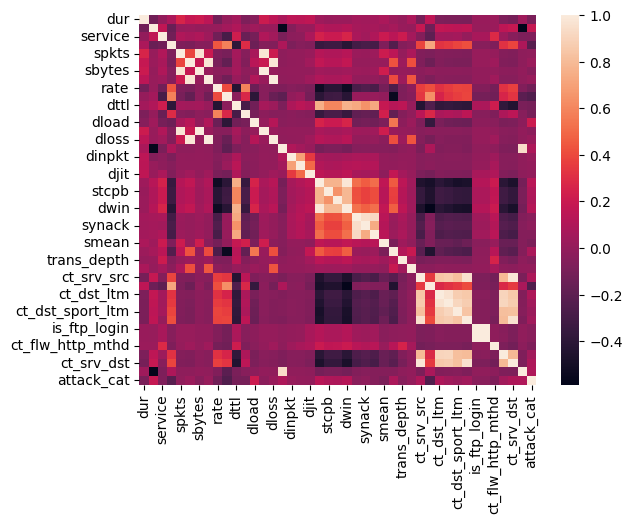

In [ ]:
sns.heatmap(data.corr())
plt.show()

In [ ]:
columns = data.columns.tolist()
corr = data.corr()
correlated_vars = []
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        if corr[columns[i]][columns[j]] > 0.98:
            print(columns[i], columns[j], corr[columns[i]][columns[j]])
            correlated_vars.append(columns[j])

sbytes sloss 0.9957715772406667
dbytes dloss 0.996711133831455
swin dwin 0.9804584289136496
is_ftp_login ct_ftp_cmd 0.9988554882935726


In [ ]:
data = data.drop(columns=correlated_vars)

In [ ]:
smap = {'FIN':0,'INT':1,'CON':2,'REQ':3,'RST':4,'ECO':5 ,'ACC':6 ,'PAR':7,'URN':8,'no':9 ,'CLO':10}
data['state'] = data['state'].map(smap)
data.drop('service',axis = 1,inplace= True)

In [ ]:
le = LabelEncoder()
data['attack_cat_num'] = le.fit_transform(data['attack_cat'])
data.drop(columns=['attack_cat'], inplace=True)

In [ ]:
data.dtypes

dur                  float64
proto                  int64
service                int64
state                  int64
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_ltm       int64
ct_dst_src_ltm         int64
is_ftp_login           int64
ct_flw_http_mt

In [ ]:
X = data.drop(columns=['attack_cat_num'])
feature_list = list(X.columns)
X = np.array(X)
y = data['attack_cat_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 206138
Testing set: 51535


In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with 20 components
pca = PCA(n_components=20)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train)

# Transform the test data using the fitted PCA
X_test_pca = pca.transform(X_test)

# Train a model on the transformed data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_pca, y_train)

# Evaluate the model
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.11      0.20       519
           1       0.36      0.03      0.05       468
           2       0.32      0.24      0.27      3292
           3       0.62      0.77      0.69      9080
           4       0.59      0.54      0.56      4831
           5       1.00      0.98      0.99     11537
           6       0.89      0.92      0.90     18613
           7       0.83      0.70      0.76      2852
           8       0.56      0.40      0.47       309
           9       0.47      0.21      0.29        34

    accuracy                           0.80     51535
   macro avg       0.64      0.49      0.52     51535
weighted avg       0.79      0.80      0.79     51535



In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the RFE object and specify number of features to select
rfe = RFE(estimator=rf, n_features_to_select=25, step=1)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Print the ranking of each feature
print(rfe.ranking_)




[ 1  1  1  8  5  1  1  1  1  1  7  1  1  1  1  1  2 10  4  6  1  1  1  1
  1 12  9  1  1  1  1  1  1 14 11  3  1 13]


In [ ]:
# Use the RFE object to transform the training and test data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the random forest classifier on the transformed data
rf.fit(X_train_rfe, y_train)

# Evaluate the model on the test data
y_pred_rf = rf.predict(X_test_rfe)

# Calculate the probability of each class for each sample
y_proba_rf = rf.predict_proba(X_test_rfe)

# Calculate the trust score for each sample
trust_scores_rf = np.zeros(len(X_test))
for i in range(len(X_test)):
    class_probs = y_proba_rf[i]
    max_prob = np.max(class_probs)
    trust_scores_rf[i] = max_prob / np.sum(class_probs)


In [ ]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))
print('Trust Score:', trust_scores_rf)

Accuracy: 0.8283108566993306
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.13      0.23       519
           1       0.68      0.10      0.17       468
           2       0.35      0.25      0.29      3292
           3       0.64      0.82      0.72      9080
           4       0.69      0.64      0.66      4831
           5       1.00      0.98      0.99     11537
           6       0.92      0.94      0.93     18613
           7       0.92      0.75      0.83      2852
           8       0.69      0.61      0.65       309
           9       0.64      0.47      0.54        34

    accuracy                           0.83     51535
   macro avg       0.74      0.57      0.60     51535
weighted avg       0.83      0.83      0.82     51535

Confusion Matrix:
[[   69     1    92   260    43     0    54     0     0     0]
 [    0    46    87   269    59     1     1     3     2     0]
 [    0     1   816  2345    66     6    29  

In [ ]:
# Open a CSV file for writing and write the trust score
with open("trust_scores.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerow(["Trust Score"])
    writer.writerow([trust_scores_rf])

In [ ]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb = XGBClassifier()

# Create the RFE object and specify number of features to select
rfe = RFE(estimator=xgb, n_features_to_select=25, step=1)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Print the ranking of each feature
print(rfe.ranking_)

# Use the RFE object to transform the training and test data
X_train_rfe_1 = rfe.transform(X_train)
X_test_rfe_1 = rfe.transform(X_test)

# Train the XGBoost classifier on the transformed data
xgb.fit(X_train_rfe_1, y_train)

# Evaluate the model on the test data
y_pred_1 = xgb.predict(X_test_rfe_1)
print("Accuracy:", accuracy_score(y_test, y_pred_1))